对程序运行结果进行分析

In [125]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [129]:
def func_base(X, a, b, c):
    return  sum([j*np.power(X,i) for i,j in enumerate([a, b, c])])
def data_savgol(x,y):
    popt,_ =  curve_fit(func_base,x,y)
    return func_base(x,*popt)

In [121]:
runTags = ['$MCM$','$MCM_2$']
numworks = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
m = [256, 512, 1024, 2048, 4096]
data = {step_:{i:{} for i in numworks} for step_ in runTags}

for num_works in numworks:
    for m_ in m:
        for runTag in range(1,3):
            file = "out_put/numworkers_{}_m_{}_runAlgorithmTag_{}.txt".format(num_works,m_,runTag)
            with open(file, "r", encoding='utf-8') as f:
                data[runTags[runTag - 1 ]][num_works][m_] = f.readlines()
                f.close

for runTag in runTags:
    for num_works in numworks:
        for m_ in m:
            temp = data[runTag][num_works][m_]
            temp = [i.replace('\n','') for i in temp] 
            temp[0] = float(temp[0].replace('s',''))
                
            temp[1] = int(temp[1])
            temp[2:] = [float(zsum.replace('{}: '.format(iters + 1),'').replace('','')) for iters,zsum in enumerate(temp[2:])]

            data[runTag][num_works][m_] = temp

times = {}
iters = {}
for runTag in runTags:
    times[runTag] = []
    iters[runTag] = []
    for num_works in numworks:
        temp_time = []
        temp_iters = []
        for m_ in m:
            temp_time.append(data[runTag][num_works][m_][0])
            temp_iters.append(data[runTag][num_works][m_][1])
            data[runTag][num_works][m_] = data[runTag][num_works][m_][2:]
        times[runTag].append(temp_time)
        iters[runTag].append(temp_iters)
    times[runTag] = np.array(times[runTag])
    iters[runTag] = np.array(iters[runTag])

T1 = np.array([times[runTag][0] for runTag in runTags]).mean(0)
speedup = {runTag: (T1 /times[runTag])/np.array(numworks).reshape(10,1) for runTag in runTags}

Text(0.5, 0, '$numworks$')

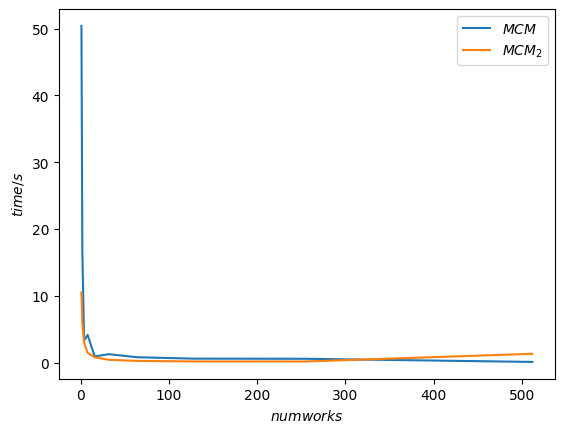

In [119]:
plt.figure()
for runTag in runTags:
    plt.plot(numworks,times[runTag][:,0],label = runTag)
plt.legend()
plt.ylabel('$time/s$')
plt.xlabel('$numworks$')
x

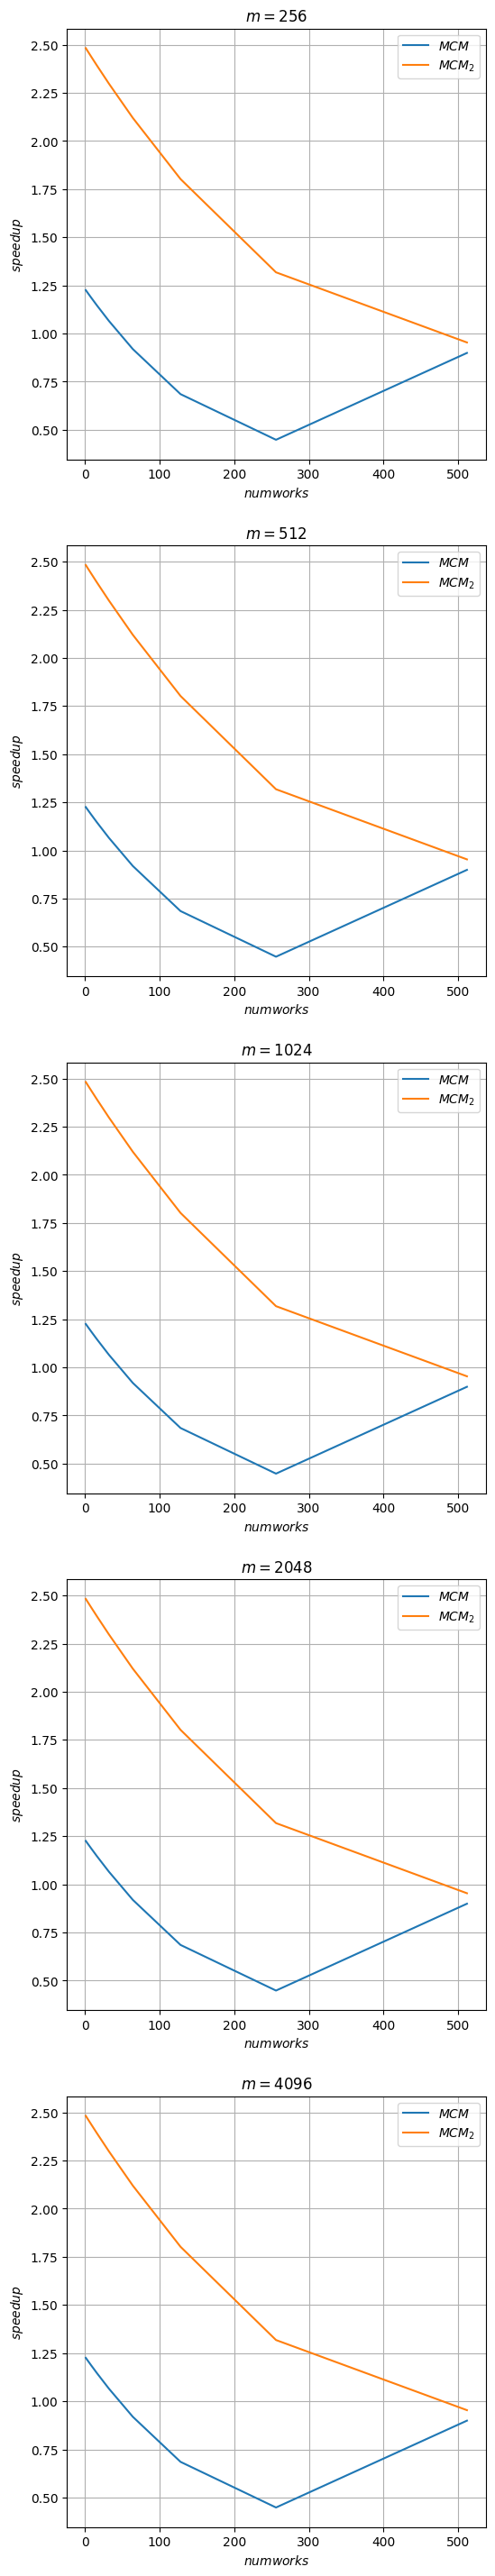

In [141]:
for runTag in runTags:
    for j in range(5):
        speedup[runTag][:,j] = data_savgol(numworks,speedup[runTag][:,j])

fig,axis = plt.subplots(5,1,figsize = (6,36))
for i in range(5):
    for runTag in runTags:
        axis[i].plot(numworks,speedup[runTag][:,i],label = runTag)
    axis[i].legend()
    axis[i].set_ylabel('$speedup$')
    axis[i].set_xlabel('$numworks$')
    axis[i].grid()
    axis[i].set_title('$m = {}$'.format(m[i]))

(5,)